In [1]:
import pandas as pd

In [2]:
import os
import pandas as pd

# Correct paths
RAW_DIR = "../dataset/raw/vehicle_damage_dataset"
PROCESSED_DIR = "../dataset/processed"

# Create processed folder if it doesn't exist
os.makedirs(PROCESSED_DIR, exist_ok=True)

CSV_PATH = os.path.join(RAW_DIR, "labels.csv")
CLEAN_CSV_PATH = os.path.join(PROCESSED_DIR, "labels_clean.csv")

# Load CSV
df = pd.read_csv(CSV_PATH)
print("✅ CSV loaded. Total rows:", len(df))

# 1️⃣ Remove duplicate rows
df = df.drop_duplicates()
print("✅ Duplicates removed. Rows remaining:", len(df))

# 2️⃣ Remove rows with missing values
df = df.dropna()
print("✅ Missing values removed. Rows remaining:", len(df))

# 3️⃣ Verify that image files exist
def image_exists(row):
    img_path = os.path.join(RAW_DIR, row['image_path'])
    return os.path.isfile(img_path)

df = df[df.apply(image_exists, axis=1)]
print("✅ Non-existing images removed. Rows remaining:", len(df))

# 4️⃣ Reset index
df.reset_index(drop=True, inplace=True)

# 5️⃣ Save cleaned CSV to processed folder
df.to_csv(CLEAN_CSV_PATH, index=False)
print("✅ Cleaned CSV saved at:", CLEAN_CSV_PATH)


✅ CSV loaded. Total rows: 11386
✅ Duplicates removed. Rows remaining: 11386
✅ Missing values removed. Rows remaining: 11386
✅ Non-existing images removed. Rows remaining: 11386
✅ Cleaned CSV saved at: ../dataset/processed\labels_clean.csv


In [3]:
import cv2
import os
import pandas as pd

# Paths
RAW_DIR = "../dataset/raw/vehicle_damage_dataset"
PROCESSED_DIR = "../dataset/processed"

# Create processed folder if it doesn't exist
os.makedirs(PROCESSED_DIR, exist_ok=True)

CSV_PATH = os.path.join(RAW_DIR, "labels.csv")
OUTPUT_CSV = os.path.join(PROCESSED_DIR, "labels_no_corrupted.csv")

# Load CSV
df = pd.read_csv(CSV_PATH)
print("✅ CSV loaded. Total rows:", len(df))

valid_rows = []

for _, row in df.iterrows():
    img_path = os.path.join(RAW_DIR, row['image_path'])
    img = cv2.imread(img_path)

    if img is None:
        print("❌ Corrupted:", img_path)
        continue

    valid_rows.append(row)

# Save cleaned CSV to processed folder
df_clean = pd.DataFrame(valid_rows)
df_clean.to_csv(OUTPUT_CSV, index=False)

print("✅ Corrupted images removed")
print("✅ Clean CSV saved at:", OUTPUT_CSV)


✅ CSV loaded. Total rows: 11386
✅ Corrupted images removed
✅ Clean CSV saved at: ../dataset/processed\labels_no_corrupted.csv


In [4]:
pip install imagehash pillow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import pandas as pd
import imagehash
from PIL import Image

# Paths
RAW_DIR = "../dataset/raw/vehicle_damage_dataset"
PROCESSED_DIR = "../dataset/processed"

os.makedirs(PROCESSED_DIR, exist_ok=True)

INPUT_CSV = os.path.join(PROCESSED_DIR, "labels_no_corrupted.csv")
OUTPUT_CSV = os.path.join(PROCESSED_DIR, "labels_no_duplicates.csv")

# Load CSV
df_clean = pd.read_csv(INPUT_CSV)
print("✅ CSV loaded:", len(df_clean))

hashes = {}
unique_rows = []

for _, row in df_clean.iterrows():
    img_path = os.path.join(RAW_DIR, row['image_path'])

    # Debug check
    if not os.path.exists(img_path):
        print("❌ Missing file:", img_path)
        continue

    try:
        img = Image.open(img_path).convert("RGB")
    except Exception as e:
        print("❌ Cannot open:", img_path, "|", e)
        continue

    img_hash = imagehash.phash(img)

    if img_hash in hashes:
        print("🔁 Duplicate:", img_path)
        continue

    hashes[img_hash] = img_path
    unique_rows.append(row)

# Save output
df_unique = pd.DataFrame(unique_rows)
df_unique.to_csv(OUTPUT_CSV, index=False)

print("✅ Duplicate images removed")
print("✅ File saved at:", OUTPUT_CSV)


✅ CSV loaded: 11386
🔁 Duplicate: ../dataset/raw/vehicle_damage_dataset\real\vehicle_damage\REAL\1009.jpg
🔁 Duplicate: ../dataset/raw/vehicle_damage_dataset\real\vehicle_damage\REAL\1143.jpg
🔁 Duplicate: ../dataset/raw/vehicle_damage_dataset\real\vehicle_damage\REAL\1180.jpg
🔁 Duplicate: ../dataset/raw/vehicle_damage_dataset\real\vehicle_damage\REAL\1287.jpg
🔁 Duplicate: ../dataset/raw/vehicle_damage_dataset\real\vehicle_damage\REAL\1352.jpg
🔁 Duplicate: ../dataset/raw/vehicle_damage_dataset\real\vehicle_damage\REAL\1377.jpg
🔁 Duplicate: ../dataset/raw/vehicle_damage_dataset\real\vehicle_damage\REAL\1382.jpg
🔁 Duplicate: ../dataset/raw/vehicle_damage_dataset\real\vehicle_damage\REAL\1398.jpg
🔁 Duplicate: ../dataset/raw/vehicle_damage_dataset\real\vehicle_damage\REAL\1409.jpg
🔁 Duplicate: ../dataset/raw/vehicle_damage_dataset\real\vehicle_damage\REAL\1468.jpg
🔁 Duplicate: ../dataset/raw/vehicle_damage_dataset\real\vehicle_damage\REAL\1513.jpg
🔁 Duplicate: ../dataset/raw/vehicle_damage_da

In [6]:
print("Before removing duplicates :", len(df_clean))
print("After removing duplicates  :", len(df_unique))
print("Duplicates removed         :", len(df_clean) - len(df_unique))

Before removing duplicates : 11386
After removing duplicates  : 10284
Duplicates removed         : 1102


In [7]:
import cv2
import os
import pandas as pd

# Paths
RAW_DIR = "../dataset/raw/vehicle_damage_dataset"
PROCESSED_DIR = "../dataset/processed"

INPUT_CSV = os.path.join(PROCESSED_DIR, "labels_no_duplicates.csv")
CLEAR_CSV = os.path.join(PROCESSED_DIR, "labels_no_blur.csv")
BLUR_CSV = os.path.join(PROCESSED_DIR, "labels_blur.csv")

os.makedirs(PROCESSED_DIR, exist_ok=True)

# Load CSV
df = pd.read_csv(INPUT_CSV)

blur_rows = []
clear_rows = []

BLUR_THRESHOLD = 100  # Adjust if needed

for _, row in df.iterrows():
    img_path = os.path.join(RAW_DIR, row['image_path'])
    img = cv2.imread(img_path)

    if img is None:
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    variance = cv2.Laplacian(gray, cv2.CV_64F).var()

    if variance < BLUR_THRESHOLD:
        blur_rows.append(row)
    else:
        clear_rows.append(row)

# Create DataFrames
df_blur = pd.DataFrame(blur_rows)
df_clear = pd.DataFrame(clear_rows)

# Save CSVs
df_blur.to_csv(BLUR_CSV, index=False)
df_clear.to_csv(CLEAR_CSV, index=False)

# Print summary
print("✅ Blur Analysis Completed")
print("Total images BEFORE blur removal :", len(df))
print("Blur images detected            :", len(df_blur))
print("Clear images retained           :", len(df_clear))
print("✅ Clear images CSV saved at     :", CLEAR_CSV)
print("⚠️ Blur images CSV saved at      :", BLUR_CSV)


✅ Blur Analysis Completed
Total images BEFORE blur removal : 10284
Blur images detected            : 3101
Clear images retained           : 7183
✅ Clear images CSV saved at     : ../dataset/processed\labels_no_blur.csv
⚠️ Blur images CSV saved at      : ../dataset/processed\labels_blur.csv


EDA

In [8]:
import os
import pandas as pd

PROCESSED_DIR = "../dataset/processed"
CSV_PATH = os.path.join(PROCESSED_DIR, "labels_no_blur.csv")

df = pd.read_csv(CSV_PATH)

print("✅ CSV loaded")
print("Total images:", len(df))
df.head()


✅ CSV loaded
Total images: 7183


,image_path,class,damage_category
0,real\vehicle_damage\REAL\1.jpg,real,vehicle_damage
1,real\vehicle_damage\REAL\1002.jpg,real,vehicle_damage
2,real\vehicle_damage\REAL\1006.jpg,real,vehicle_damage
3,real\vehicle_damage\REAL\1010.jpg,real,vehicle_damage
4,real\vehicle_damage\REAL\1013.jpg,real,vehicle_damage


In [9]:
df['class'] = df['image_path'].apply(
    lambda x: 'real' if x.lower().startswith('real') else 'fake'
)

df['class'].value_counts()


class
fake    4186
real    2997
Name: count, dtype: int64

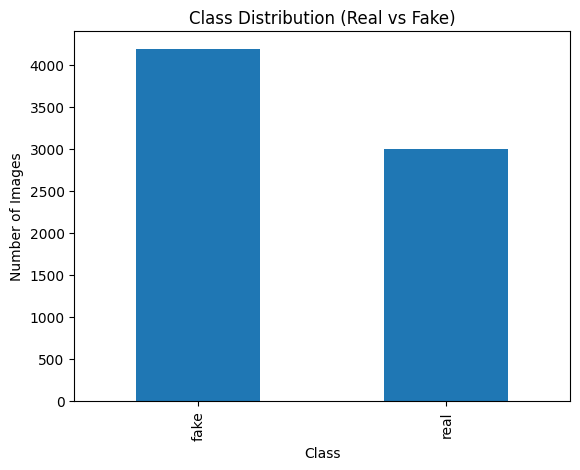

In [10]:
import matplotlib.pyplot as plt

class_counts = df['class'].value_counts()

plt.figure()
class_counts.plot(kind='bar')
plt.title("Class Distribution (Real vs Fake)")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()



In [11]:
import cv2
import numpy as np

RAW_DIR = "../dataset/raw/vehicle_damage_dataset"

heights = []
widths = []

for path in df['image_path'].sample(200):  # sample to speed up
    img_path = os.path.join(RAW_DIR, path)
    img = cv2.imread(img_path)
    
    if img is None:
        continue
    
    h, w, _ = img.shape
    heights.append(h)
    widths.append(w)

print("Height range:", min(heights), "-", max(heights))
print("Width range :", min(widths), "-", max(widths))


Height range: 32 - 1121
Width range : 32 - 1495


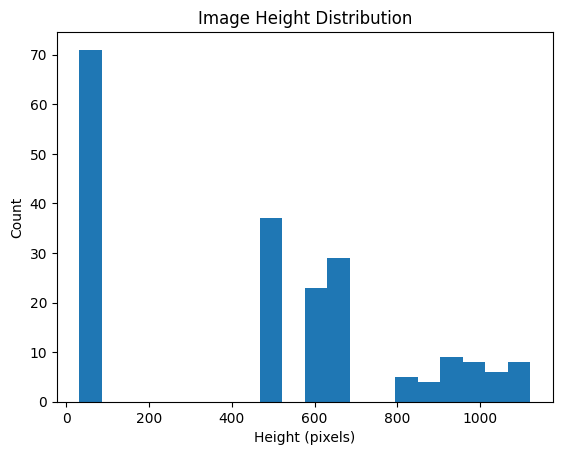

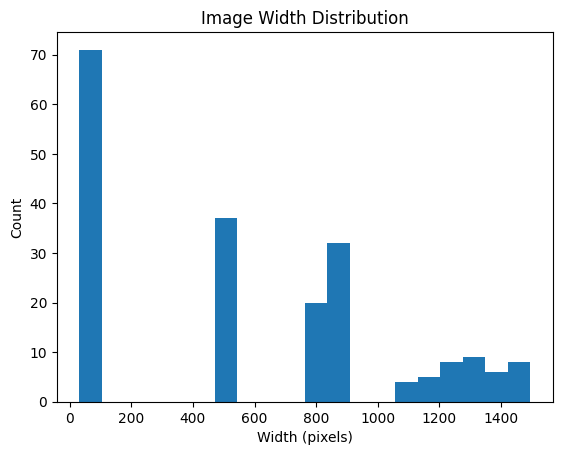

In [12]:
plt.figure()
plt.hist(heights, bins=20)
plt.title("Image Height Distribution")
plt.xlabel("Height (pixels)")
plt.ylabel("Count")
plt.show()

plt.figure()
plt.hist(widths, bins=20)
plt.title("Image Width Distribution")
plt.xlabel("Width (pixels)")
plt.ylabel("Count")
plt.show()


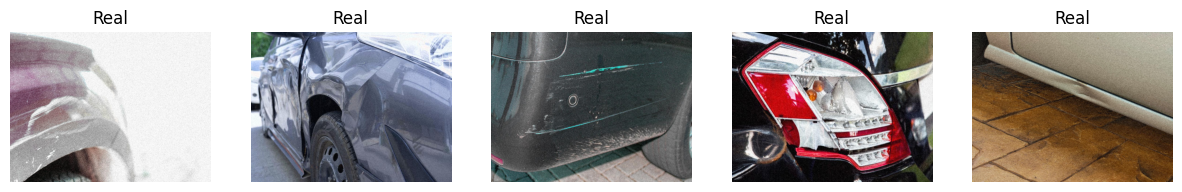

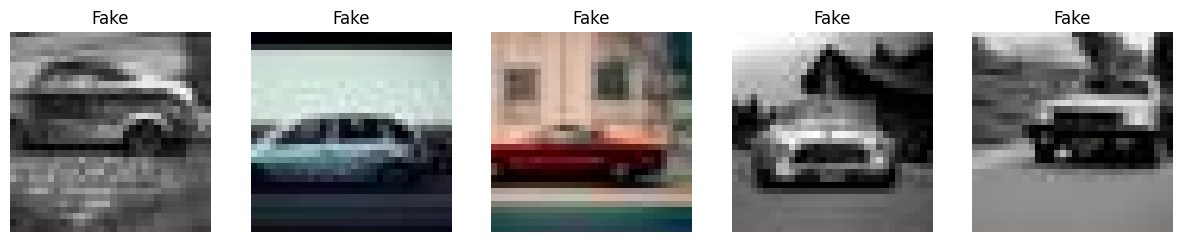

In [13]:
import os
import matplotlib.pyplot as plt
from PIL import Image


RAW_DIR = "../dataset/raw/vehicle_damage_dataset"

def show_samples(df, label, n=5):
    samples = df[df['class'] == label].head(n)
    plt.figure(figsize=(15,3))

    shown = 0
    for _, row in samples.iterrows():
        img_path = os.path.join(RAW_DIR, row['image_path'])

        if not os.path.exists(img_path):
            print("❌ Missing:", img_path)
            continue

        try:
            img = Image.open(img_path).convert("RGB")
        except Exception:
            print("❌ Cannot open:", img_path)
            continue

        plt.subplot(1, n, shown + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(label.capitalize())

        shown += 1
        if shown == n:
            break

    plt.show()


# Show samples
show_samples(df, "real", n=5)
show_samples(df, "fake", n=5)


Trying to load: ../dataset/raw/vehicle_damage_dataset\real\vehicle_damage\REAL\1.jpg


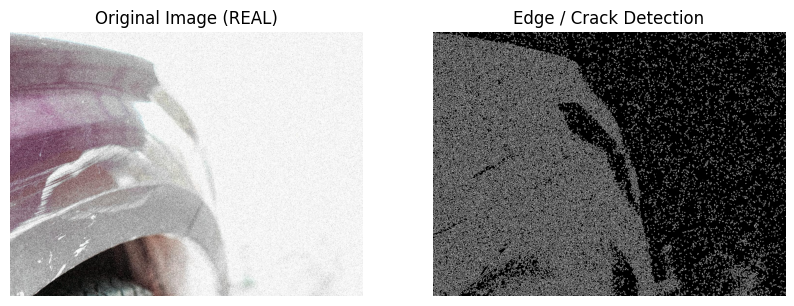

In [21]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Correct paths
RAW_DIR = "../dataset/raw/vehicle_damage_dataset"
PROCESSED_DIR = "../dataset/processed"
CSV_PATH = os.path.join(PROCESSED_DIR, "labels_no_blur.csv")

# Load CSV
df = pd.read_csv(CSV_PATH)

# Ensure class column exists
df['class'] = df['image_path'].apply(
    lambda x: 'real' if x.lower().startswith('real') else 'fake'
)

# Take one REAL image
row = df[df['class'] == 'real'].iloc[0]
img_path = os.path.join(RAW_DIR, row['image_path'])

print("Trying to load:", img_path)

img = cv2.imread(img_path)

if img is None:
    print("❌ Image not found:", img_path)
else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)

    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image (REAL)")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(edges, cmap="gray")
    plt.title("Edge / Crack Detection")
    plt.axis("off")

    plt.show()


In [22]:
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
texture_strength = laplacian.var()

print("Texture variance:", texture_strength)

Texture variance: 1434.7126271860795


Texture variance: 1434.7126271860795


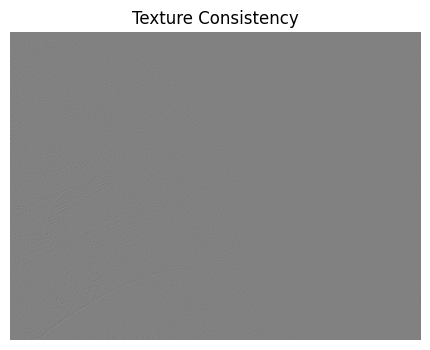

In [23]:

import cv2
import matplotlib.pyplot as plt

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
texture_strength = laplacian.var()
print("Texture variance:", texture_strength)
plt.figure(figsize=(6,4))
plt.imshow(laplacian, cmap="gray")
plt.title("Texture Consistency")
plt.axis("off")
plt.show()

# # Laplacian highlights texture variations
# texture = cv2.Laplacian(gray, cv2.CV_64F)

# plt.figure(figsize=(6,4))
# plt.imshow(texture, cmap="gray")
# plt.title("Texture Consistency")
# plt.axis("off")
# plt.show()


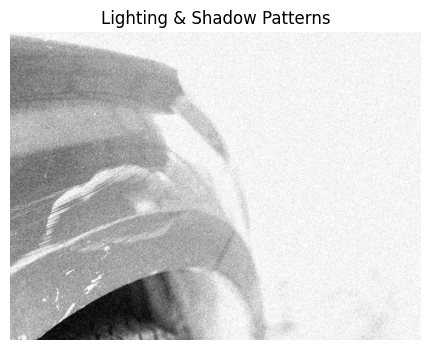

In [24]:
import numpy as np

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
brightness = hsv[:,:,2]

plt.figure(figsize=(6,4))
plt.imshow(brightness, cmap="gray")
plt.title("Lighting & Shadow Patterns")
plt.axis("off")
plt.show()


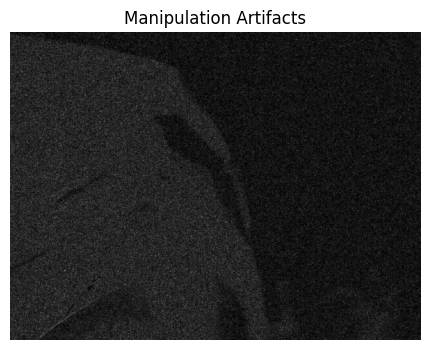

In [25]:
noise = cv2.absdiff(gray, cv2.GaussianBlur(gray, (5,5), 0))

plt.figure(figsize=(6,4))
plt.imshow(noise, cmap="gray")
plt.title("Manipulation Artifacts")
plt.axis("off")
plt.show()

✅ CSV loaded: 7183 rows

📊 Class Distribution (Count)
class
fake    4186
real    2997
Name: count, dtype: int64

📊 Class Distribution (%)
class
fake    58.28
real    41.72
Name: proportion, dtype: float64


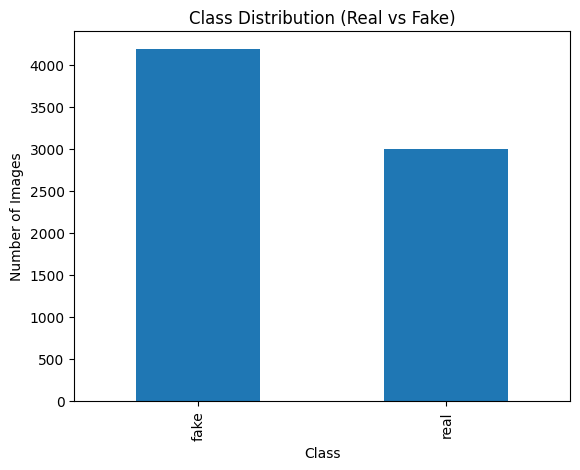


📐 Image Size Statistics
Min Width : 32
Max Width : 1500
Avg Width : 549
Min Height: 32
Max Height: 1125
Avg Height: 443

❌ Corrupted Images: 0
Corrupted %: 0.0 %

😵 Blurry Images: 0
✅ Clear Images : 7183

🎨 Pixel Statistics
Avg Pixel Mean: 120.95
Avg Pixel Std : 59.99

💡 Lighting Statistics
Min Brightness: 52
Max Brightness: 227
Avg Brightness: 133

⚠️ Brightness Outliers: 2

📋 DATASET SUMMARY


,Total Images,Real Images,Fake Images,Corrupted Images,Blurry Images,Clear Images
Count,7183,2997,4186,0,0,7183


In [27]:
# # ===============================
# # EDA FOR VEHICLE DAMAGE DATASET
# # ===============================

# import os
# import cv2
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from PIL import Image

# # -----------------------------
# # PATHS (IMPORTANT)
# # -----------------------------

# RAW_DIR = "../dataset\raw\vehicle_damage_dataset"
# PROCESSED_DIR = "../dataset/processed"

# CSV_PATH = os.path.join(PROCESSED_DIR, "labels_no_blur.csv")

# # -----------------------------
# # LOAD CSV
# # -----------------------------
# df = pd.read_csv(CSV_PATH)

# # Ensure class column exists
# if 'class' not in df.columns:
#     df['class'] = df['image_path'].apply(
#         lambda x: 'real' if x.lower().startswith('real') else 'fake'
#     )

# print("✅ CSV loaded:", len(df), "rows")

# # -----------------------------
# # 1️⃣ CLASS DISTRIBUTION
# # -----------------------------
# class_counts = df['class'].value_counts()
# class_percent = df['class'].value_counts(normalize=True) * 100

# print("\n📊 Class Distribution (Count)")
# print(class_counts)

# print("\n📊 Class Distribution (%)")
# print(class_percent.round(2))

# class_counts.plot(kind='bar', title="Class Distribution (Real vs Fake)")
# plt.xlabel("Class")
# plt.ylabel("Number of Images")
# plt.show()

# # -----------------------------
# # 2️⃣ IMAGE DIMENSION STATISTICS
# # -----------------------------
# widths, heights = [], []

# for path in df['image_path']:
#     img_path = os.path.join(RAW_DIR, path)

#     if not os.path.exists(img_path):
#         continue

#     try:
#         with Image.open(img_path) as img:
#             w, h = img.size
#             widths.append(w)
#             heights.append(h)
#     except Exception:
#         continue

# print("\n📐 Image Size Statistics")
# print("Min Width :", min(widths))
# print("Max Width :", max(widths))
# print("Avg Width :", int(np.mean(widths)))
# print("Min Height:", min(heights))
# print("Max Height:", max(heights))
# print("Avg Height:", int(np.mean(heights)))

# # -----------------------------
# # 3️⃣ CORRUPTED IMAGE CHECK
# # -----------------------------
# corrupted = []

# for path in df['image_path']:
#     try:
#         Image.open(os.path.join(RAW_DIR, path)).verify()
#     except Exception:
#         corrupted.append(path)

# print("\n❌ Corrupted Images:", len(corrupted))
# print("Corrupted %:", round(len(corrupted) / len(df) * 100, 2), "%")

# # -----------------------------
# # 4️⃣ BLUR DETECTION
# # -----------------------------
# def is_blurry(image, threshold=100):
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     variance = cv2.Laplacian(gray, cv2.CV_64F).var()
#     return variance < threshold

# blur_count, clear_count = 0, 0

# for path in df['image_path']:
#     img_path = os.path.join(RAW_DIR, path)
#     img = cv2.imread(img_path)

#     if img is None:
#         continue

#     if is_blurry(img):
#         blur_count += 1
#     else:
#         clear_count += 1

# print("\n😵 Blurry Images:", blur_count)
# print("✅ Clear Images :", clear_count)

# # -----------------------------
# # 5️⃣ PIXEL INTENSITY ANALYSIS
# # -----------------------------
# pixel_means, pixel_stds = [], []

# for path in df['image_path'][:300]:  # sample for speed
#     img = cv2.imread(os.path.join(RAW_DIR, path))
#     if img is None:
#         continue

#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     pixel_means.append(img.mean())
#     pixel_stds.append(img.std())

# print("\n🎨 Pixel Statistics")
# print("Avg Pixel Mean:", round(np.mean(pixel_means), 2))
# print("Avg Pixel Std :", round(np.mean(pixel_stds), 2))

# # -----------------------------
# # 6️⃣ BRIGHTNESS ANALYSIS
# # -----------------------------
# brightness_vals = []

# for path in df['image_path'][:300]:
#     img = cv2.imread(os.path.join(RAW_DIR, path))
#     if img is None:
#         continue

#     hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#     brightness_vals.append(hsv[:, :, 2].mean())

# print("\n💡 Lighting Statistics")
# print("Min Brightness:", int(min(brightness_vals)))
# print("Max Brightness:", int(max(brightness_vals)))
# print("Avg Brightness:", int(np.mean(brightness_vals)))

# # -----------------------------
# # 7️⃣ BRIGHTNESS OUTLIERS
# # -----------------------------
# outliers = [b for b in brightness_vals if b < 40 or b > 220]
# print("\n⚠️ Brightness Outliers:", len(outliers))

# # -----------------------------
# # 8️⃣ DATASET SUMMARY TABLE
# # -----------------------------
# summary = {
#     "Total Images": len(df),
#     "Real Images": class_counts.get("real", 0),
#     "Fake Images": class_counts.get("fake", 0),
#     "Corrupted Images": len(corrupted),
#     "Blurry Images": blur_count,
#     "Clear Images": clear_count
# }

# summary_df = pd.DataFrame(summary, index=["Count"])

# print("\n📋 DATASET SUMMARY")
# display(summary_df)
# ===============================
# EDA FOR VEHICLE DAMAGE DATASET
# ===============================

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# -----------------------------
# PATHS (FIXED & SAFE)
# -----------------------------
RAW_DIR = os.path.normpath("../dataset/raw/vehicle_damage_dataset")
PROCESSED_DIR = os.path.normpath("../dataset/processed")
CSV_PATH = os.path.join(PROCESSED_DIR, "labels_no_blur.csv")

# -----------------------------
# LOAD CSV
# -----------------------------
df = pd.read_csv(CSV_PATH)

if 'image_path' not in df.columns:
    raise ValueError("CSV must contain 'image_path' column")

# Ensure class column exists
if 'class' not in df.columns:
    df['class'] = df['image_path'].apply(
        lambda x: 'real' if str(x).lower().startswith('real') else 'fake'
    )

print("✅ CSV loaded:", len(df), "rows")

# -----------------------------
# 1️⃣ CLASS DISTRIBUTION
# -----------------------------
class_counts = df['class'].value_counts()
class_percent = df['class'].value_counts(normalize=True) * 100

print("\n📊 Class Distribution (Count)")
print(class_counts)

print("\n📊 Class Distribution (%)")
print(class_percent.round(2))

class_counts.plot(kind='bar', title="Class Distribution (Real vs Fake)")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

# -----------------------------
# 2️⃣ IMAGE DIMENSION STATISTICS (FIXED)
# -----------------------------
widths, heights = [], []

for path in df['image_path']:
    img_path = os.path.join(RAW_DIR, path)

    if not os.path.exists(img_path):
        continue

    try:
        with Image.open(img_path) as img:
            w, h = img.size
            widths.append(w)
            heights.append(h)
    except Exception:
        continue

print("\n📐 Image Size Statistics")

if len(widths) == 0:
    print("❌ No valid images found for size analysis")
else:
    print("Min Width :", min(widths))
    print("Max Width :", max(widths))
    print("Avg Width :", int(np.mean(widths)))
    print("Min Height:", min(heights))
    print("Max Height:", max(heights))
    print("Avg Height:", int(np.mean(heights)))

# -----------------------------
# 3️⃣ CORRUPTED IMAGE CHECK (SAFE)
# -----------------------------
corrupted = []

for path in df['image_path']:
    img_path = os.path.join(RAW_DIR, path)
    if not os.path.exists(img_path):
        corrupted.append(path)
        continue

    try:
        Image.open(img_path).verify()
    except Exception:
        corrupted.append(path)

print("\n❌ Corrupted Images:", len(corrupted))
print("Corrupted %:", round(len(corrupted) / len(df) * 100, 2), "%")

# -----------------------------
# 4️⃣ BLUR DETECTION
# -----------------------------
def is_blurry(image, threshold=100):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.Laplacian(gray, cv2.CV_64F).var() < threshold

blur_count, clear_count = 0, 0

for path in df['image_path']:
    img_path = os.path.join(RAW_DIR, path)
    img = cv2.imread(img_path)

    if img is None:
        continue

    if is_blurry(img):
        blur_count += 1
    else:
        clear_count += 1

print("\n😵 Blurry Images:", blur_count)
print("✅ Clear Images :", clear_count)

# -----------------------------
# 5️⃣ PIXEL INTENSITY ANALYSIS
# -----------------------------
pixel_means, pixel_stds = [], []

for path in df['image_path'][:300]:
    img = cv2.imread(os.path.join(RAW_DIR, path))
    if img is None:
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pixel_means.append(img.mean())
    pixel_stds.append(img.std())

if pixel_means:
    print("\n🎨 Pixel Statistics")
    print("Avg Pixel Mean:", round(np.mean(pixel_means), 2))
    print("Avg Pixel Std :", round(np.mean(pixel_stds), 2))
else:
    print("\n❌ No images for pixel analysis")

# -----------------------------
# 6️⃣ BRIGHTNESS ANALYSIS (SAFE)
# -----------------------------
brightness_vals = []

for path in df['image_path'][:300]:
    img = cv2.imread(os.path.join(RAW_DIR, path))
    if img is None:
        continue

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    brightness_vals.append(hsv[:, :, 2].mean())

if brightness_vals:
    print("\n💡 Lighting Statistics")
    print("Min Brightness:", int(min(brightness_vals)))
    print("Max Brightness:", int(max(brightness_vals)))
    print("Avg Brightness:", int(np.mean(brightness_vals)))
else:
    print("\n❌ No brightness values calculated")

# -----------------------------
# 7️⃣ BRIGHTNESS OUTLIERS
# -----------------------------
outliers = [b for b in brightness_vals if b < 40 or b > 220]
print("\n⚠️ Brightness Outliers:", len(outliers))

# -----------------------------
# 8️⃣ DATASET SUMMARY TABLE
# -----------------------------
summary = {
    "Total Images": len(df),
    "Real Images": class_counts.get("real", 0),
    "Fake Images": class_counts.get("fake", 0),
    "Corrupted Images": len(corrupted),
    "Blurry Images": blur_count,
    "Clear Images": clear_count
}

summary_df = pd.DataFrame(summary, index=["Count"])

print("\n📋 DATASET SUMMARY")
display(summary_df)



✅ Features extracted: (7183, 7)


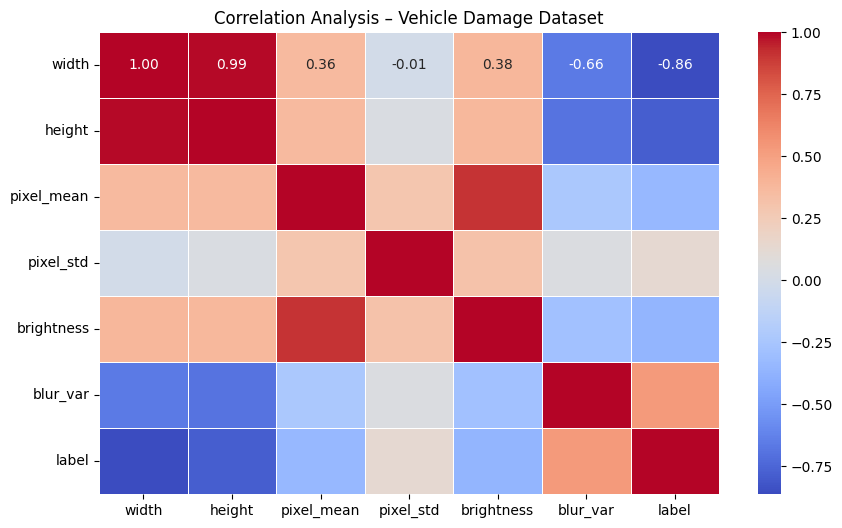

In [28]:
import os
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# PATHS
# -----------------------------
RAW_DIR = "../dataset/raw/vehicle_damage_dataset"
PROCESSED_DIR = "../dataset/processed"

CSV_PATH = os.path.join(PROCESSED_DIR, "labels_no_blur.csv")

# -----------------------------
# LOAD CSV
# -----------------------------
df = pd.read_csv(CSV_PATH)

# Ensure class column exists
if "class" not in df.columns:
    df["class"] = df["image_path"].apply(
        lambda x: "real" if x.lower().startswith("real") else "fake"
    )

# Convert labels to numeric
df["label"] = df["class"].map({"real": 0, "fake": 1})

# -----------------------------
# FEATURE EXTRACTION
# -----------------------------
def blur_variance(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.Laplacian(gray, cv2.CV_64F).var()

data = []

for _, row in df.iterrows():
    img_path = os.path.join(RAW_DIR, row["image_path"])

    img = cv2.imread(img_path)
    if img is None:
        continue

    h, w, _ = img.shape
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    data.append({
        "width": w,
        "height": h,
        "pixel_mean": img.mean(),
        "pixel_std": img.std(),
        "brightness": hsv[:, :, 2].mean(),
        "blur_var": blur_variance(img),
        "label": row["label"]
    })

# Convert to DataFrame
stats_df = pd.DataFrame(data)

print("✅ Features extracted:", stats_df.shape)

# -----------------------------
# SAFETY CHECK
# -----------------------------
if stats_df.empty:
    raise ValueError("❌ stats_df is empty — images not loaded correctly")

# -----------------------------
# CORRELATION HEATMAP
# -----------------------------
corr = stats_df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Analysis – Vehicle Damage Dataset")
plt.show()
